<a href="https://colab.research.google.com/github/nguyen451/Seismology_lab/blob/main/BonusProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The M7.7 Myanmar 28/03/2025 earthquake (643071319)

In [1]:
# set up colab environment
!pip install basemap obspy basemap-data-hires cartopy

## Set up retina display

In [2]:
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 10

# Data preparation

In [3]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# initialize the client for
client = Client("ISC")

# request event information
event = client.get_events(eventid="643071319")[0]

# print the event information
print(event)

Event:	2025-03-28T06:20:54.100000Z | +22.003,  +95.989 | 7.15 mB

	            resource_id: ResourceIdentifier(id="smi:ISC/evid=643071319")
	             event_type: 'earthquake'
	   event_type_certainty: 'known'
	          creation_info: CreationInfo(agency_id='ISC', author='ISC')
	    preferred_origin_id: ResourceIdentifier(id="smi:ISC/origid=637855596")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:ISC/magid=646381060")
	                   ---------
	     event_descriptions: 1 Elements
	               comments: 1 Elements
	                origins: 1 Elements
	             magnitudes: 7 Elements


In [ ]:
# dowload all available data using mass_downloader
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader
from pathlib import Path

# Get the origin time, latitue, and longtitude of the Myanmar earthquake event
origin_time = event.preferred_origin().time
origin_lat = event.preferred_origin().latitude
origin_lon= event.preferred_origin().longitude

# Circular domain around the epicenter: downloading data between 70 and 90 degrees distance
# degree max min question?
# inheriting the Domain class
domain = CircularDomain(latitude=origin_lat, longitude=origin_lon, minradius=0, maxradius=15)

# restrictions object
restrictions = Restrictions(
    # Get data from 1 minutes before the event to one hour after the event.
    # this defines the temporal hounds of the wavefrom data
    starttime = origin_time - 1 * 60,
    endtime = origin_time + 10 * 60,                                          # need to fix
    # discard any trace with a gap/overlap
    reject_channels_with_gaps = True,
    # get waveforms that have data for at least 95% of the requested time span
    minimum_length = 0.95,
    # no two stations should be closer than 10km to each other
    # filler out stations that are part of different networks but at the same physical station
    minimum_interstation_distance_in_m = 150E3,
    # only HH or BH channels
    channel_priorities=["BH[ZNE12XY]", "HH[ZNE]"],
    # location                                                                # ?? location which
    location_priorities=["", "00", "10"])

# specifying prividers
mdl = MassDownloader(providers=['IRIS'])
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
if not (Path("waveforms").exists() and Path("stations").exists()):
    mdl.download(domain, restrictions, mseed_storage="waveforms", stationxml_storage="stations")

[2025-04-23 23:05:18,236] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2025-04-23 23:05:18,488] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): IRIS.
[2025-04-23 23:05:18,490] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2025-04-23 23:05:18,491] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Requesting reliable availability.
[2025-04-23 23:05:20,887] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully requested availability (2.39 seconds)
[2025-04-23 23:05:20,938] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Found 33 stations (99 channels).
[2025-04-23 23:05:20,950] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Will attempt to download data from 27 stations.
[2025-04-23 23:05:20,955] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 81 time intervals/channels before downloading: NEED

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


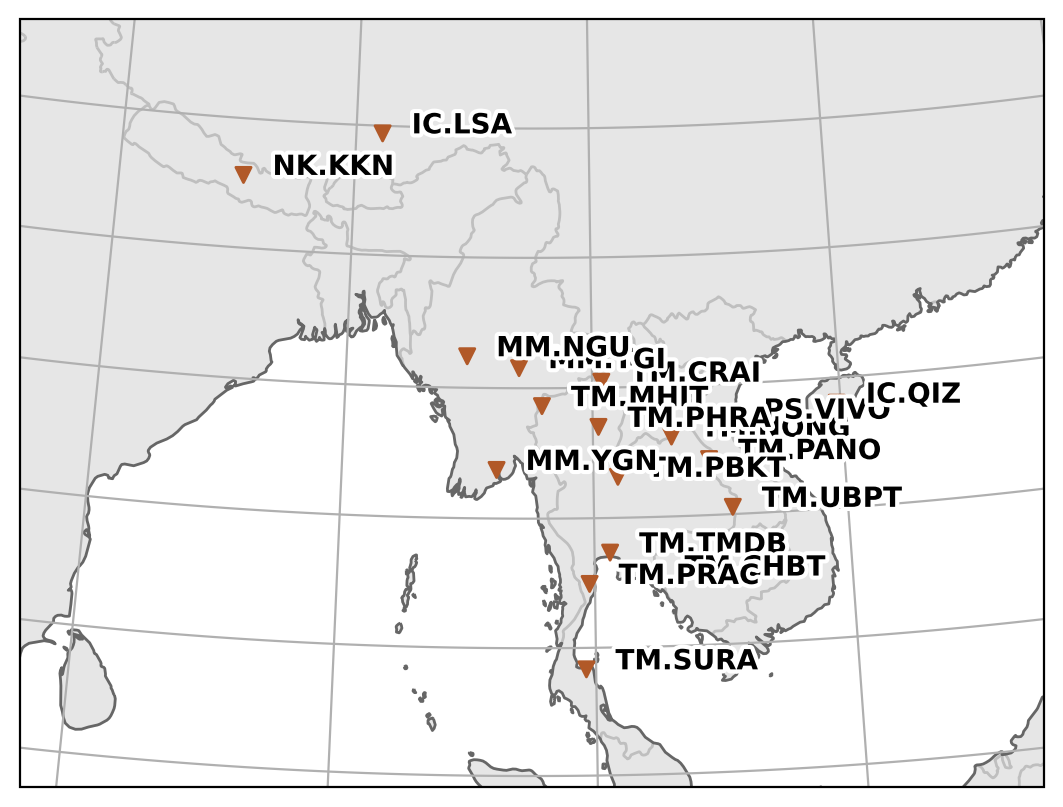

In [ ]:
# read the station metadata
from obspy import read_inventory, Inventory
import matplotlib.pyplot as plt

inv = Inventory()
#                                                           need comment here, in the read_str ..
for file in Path("stations").glob("*.xml"):
    inv += read_inventory(str(file))

inv.plot(projection='local', show=True, size=30, resolution='i')
plt.show()

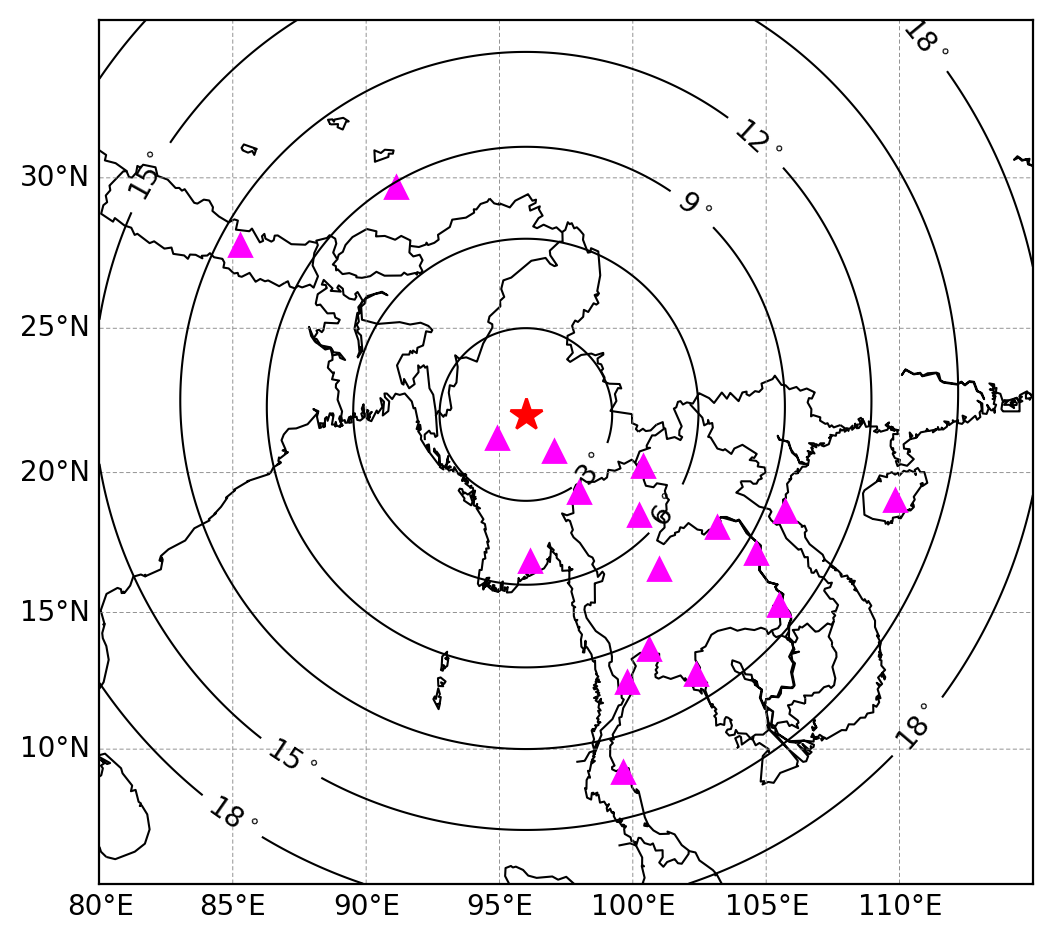

In [ ]:
# plot the sation map at the regional scale
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# create new fig and axis
fig, ax = plt.subplots()
# initialize the basemap, specifing the projection, the geographic boundary, and resolution
# the initialized map instance is attached to the axis ax
m = Basemap(projection='merc', ax=ax, llcrnrlat=5, urcrnrlat=35, llcrnrlon=80, urcrnrlon=115, resolution='l')
# draw coastlines and country boundaries
m.drawcoastlines(linewidth=0.75)
m.drawcountries(linewidth=0.75)
# draw parallels and meridians
m.drawparallels(np.arange(5, 35, 5), labels=[1, 0, 0, 0], linewidth=0.3, color='gray', dashes=(5,3))
m.drawmeridians(range(80, 115, 5), labels=[0, 0, 0, 1], linewidth=0.3, color='gray', dashes=(5,3))

# plot the epicenter
m.plot(origin_lon, origin_lat, 'r*', markersize=12, label='Epicenter', latlon=True)

# plot the station locations
for network in inv:
    for station in network:
        lon = station.longitude
        lat = station.latitude
        m.plot(lon, lat, '^', c='magenta', markersize=8, latlon=True)

# plot distance contours to the enpiter
from obspy.geodetics import locations2degrees
x = np.linspace(m.xmin, m.xmax, 300)
y = np.linspace(m.ymin, m.ymax, 300)
mlon, mlat = m(*np.meshgrid(x, y), inverse=True)
dist = locations2degrees(origin_lat, origin_lon, mlat, mlon)
mapple = m.contour(mlon, mlat, dist, levels=range(0,19,3), latlon=True, colors='k', linewidths=0.75)
plt.clabel(mapple, inline=True, fmt='%1.0f$^\circ$', colors='black', use_clabeltext=True)

# show the plot
plt.tight_layout()
plt.show()

## Waveform processing and section plot

In [ ]:
# zerophase ???

In [ ]:
from obspy import read, Stream

# read the waveform data from the download files
dstream = Stream()
for file in Path("waveforms").glob("*.mseed"):
  dstream += read(str(file))

# select only Z file for each station
# dstream = dstream.select(component='Z')

# remove instrument response
dstream.remove_response(inventory=inv, output='VEL') # get the veclocity

# trim the data to the time window of interest
dstream.filter('highpass', freq=0.1, corners=2, zerophase=False)
dstream = dstream.trim(starttime=origin_time,endtime=origin_time + 10 *60)
# append the distance in meters to the trace stats

for  tr in dstream:
  tmp = inv.select(station=tr.stats.station, network=tr.stats.network)
  stla = tmp[0][0].latitude
  stlo = tmp[0][0].longitude
  tr.data /= np.max(np.abs(tr.data))
  tr.stats.update({'distance': locations2degrees(origin_lat, origin_lon, stla, stlo)*111.1195e3,
                   'stla': stla, 'stlo' : stlo})
#

<ipython-input-36-119a491270b4>:23: RuntimeWarning: invalid value encountered in divide
  tr.data /= np.max(np.abs(tr.data))


> timing question: why start before 1 mins and then trim?

In [ ]:
for tr in dstream: print(tr)

TM.NONG.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
TM.PBKT.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
IC.QIZ.00.BHZ | 2025-03-28T06:19:54.119538Z - 2025-03-28T06:30:54.069538Z | 20.0 Hz, 13200 samples
TM.UBPT.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
TM.PANO.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
TM.PHRA.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
PS.VIVO..BHZ | 2025-03-28T06:19:54.111300Z - 2025-03-28T06:30:54.061300Z | 20.0 Hz, 13200 samples
TM.CHBT.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
TM.MHIT.00.HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 samples
MM.NGU..HHZ | 2025-03-28T06:19:54.100000Z - 2025-03-28T06:30:54.100000Z | 100.0 Hz, 66001 sample

> error because of missing data

In [ ]:
for tr in dstream: print(np.max(np.abs(tr.data))) # -> nan exists

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0


In [ ]:
print(dstream[len(dstream) - 3].data)

[nan nan nan ... nan nan nan]


In [ ]:
print(dstream[len(dstream) - 3])

NK.KKN..BHE | 2025-03-28T06:19:54.120000Z - 2025-03-28T06:30:54.100000Z | 50.0 Hz, 33000 samples


> ignore error

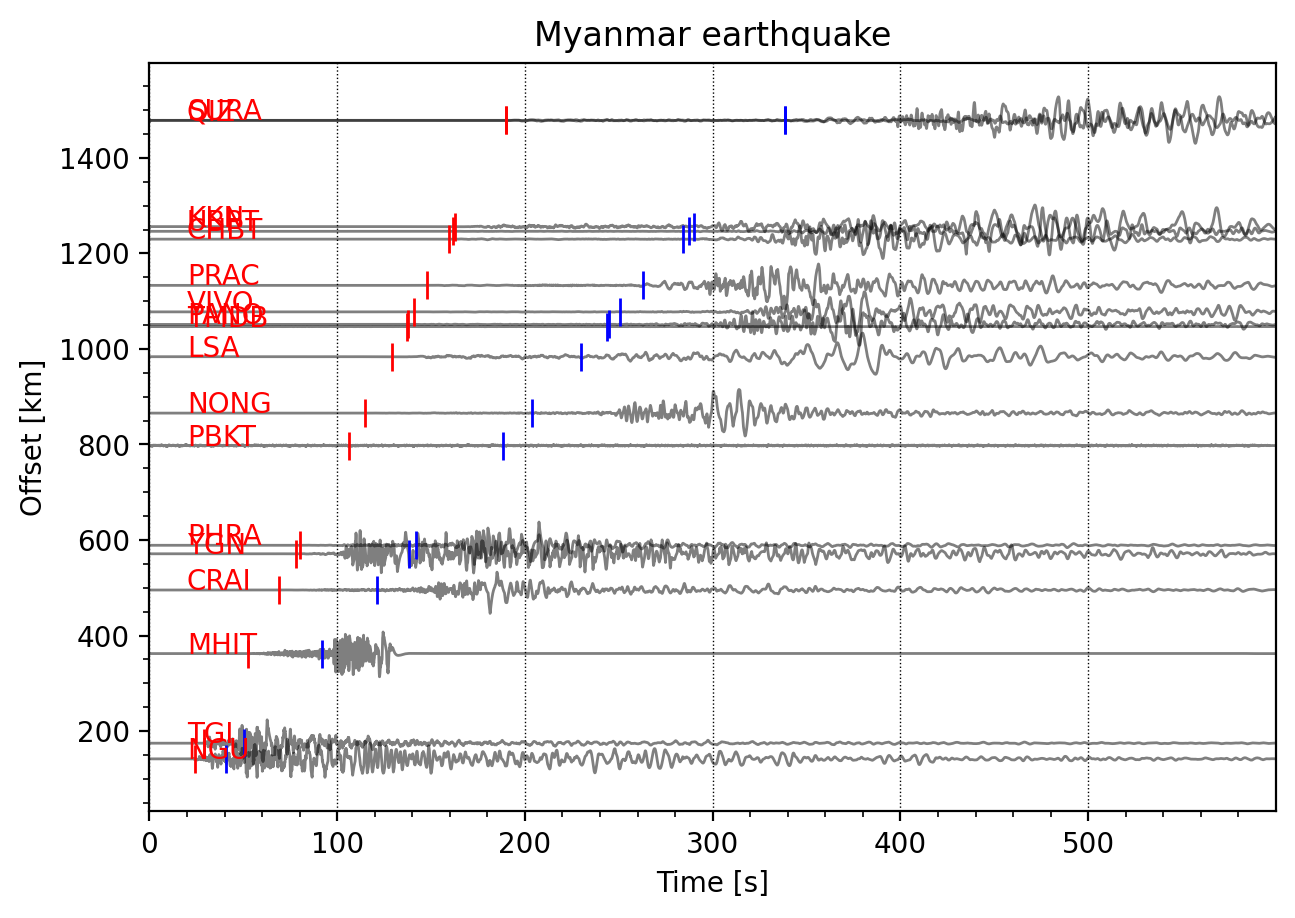

In [ ]:
from obspy.taup import TauPyModel
taup_model = TauPyModel(model='ak135')

## plot stream waveform data using the build-in plotting function
fig = plt.figure()
dstream.select(component='Z').plot(type='section', orientation='horizontal', norm_method='stream', fig=fig)

## annotate the plot with station names
ax = fig.gca()
ax.set_title('Myanmar earthquake')
for tr in dstream.select(component='Z'):
    dist_in_km = tr.stats.distance / 1e3
    ax.text(20, dist_in_km, tr.stats.station, color='r')
    # plot the predicted arrival time of P-wave
    arvs = taup_model.get_travel_times(0, dist_in_km/111.1195, phase_list=['P'])
    ax.plot(arvs[0].time, dist_in_km, '|r', markersize=10, label='P arrival')
    # save arrival to trace stats
    tr.stats.p_arrival = arvs[0].time
    # plot the predicted arrival time of S-wave
    arvs = taup_model.get_travel_times(0, dist_in_km/111.1195, phase_list=['S'])
    ax.plot(arvs[0].time, dist_in_km, '|b', markersize=10, label='S arrival')
    # save arrival to trace stats
    tr.stats.s_arrival = arvs[0].time

plt.show()

### noise!

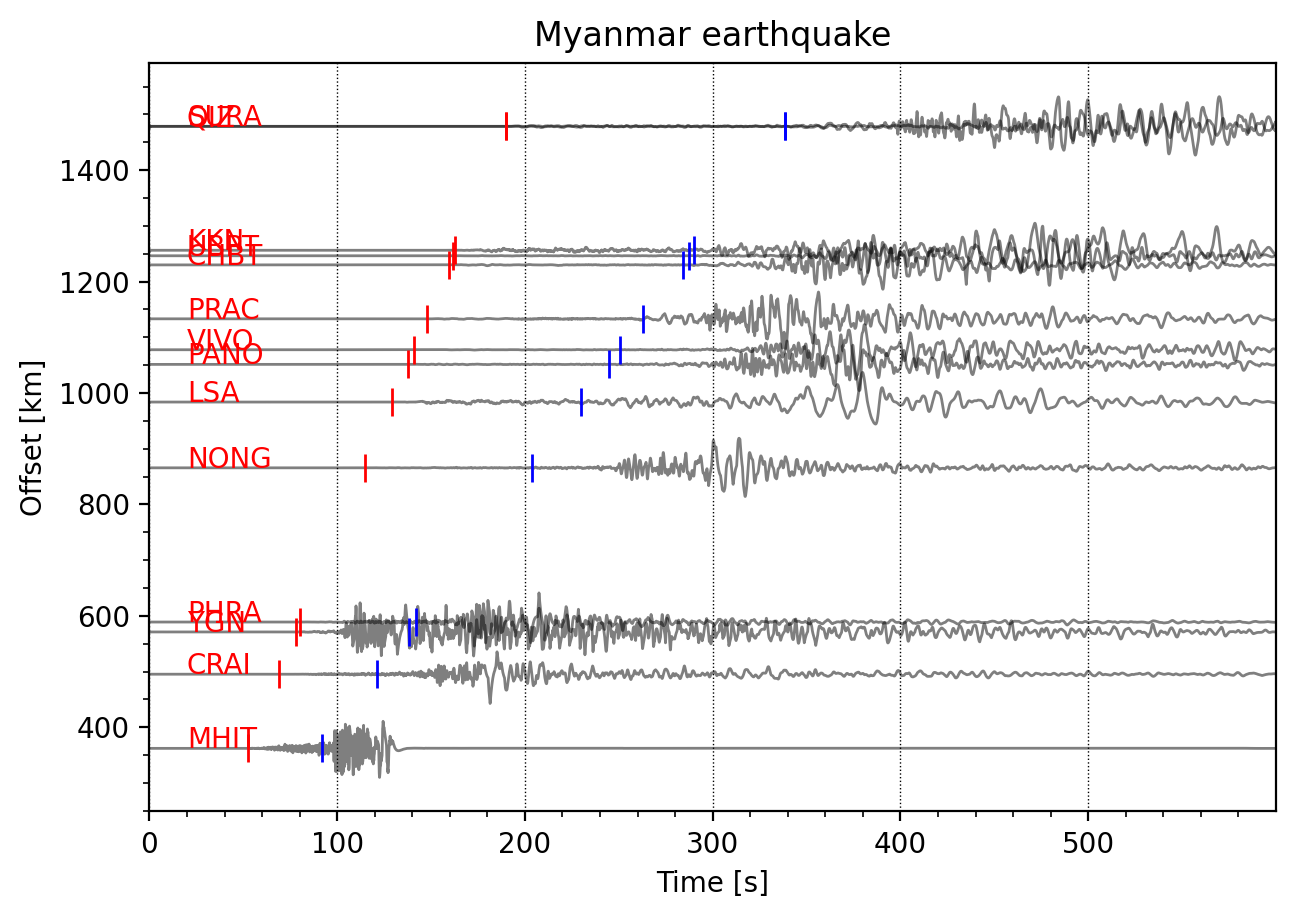

In [ ]:
## Calculate individual traces' signal to noise ratio
for tr in dstream.select(component='Z'):
    tvec = tr.times()
    # calculate the noise level
    noise = np.std(tr.data[tvec < 60])
    # calculate the signal level
    signal = np.std(tr.data[np.logical_and(tr.stats.p_arrival<=tvec, tvec<tr.stats.s_arrival+60)])
    # calculate the SNR
    tr.stats.snr = signal / noise
dstream_good = Stream([tr for tr in dstream.select(component='Z') if tr.stats.snr > 2])

## plot stream waveform data using the build-in plotting function
fig = plt.figure()
dstream_good.plot(type='section', orientation='horizontal', norm_method='stream', fig=fig)

## annotate the plot with station names
ax = fig.gca()
ax.set_title('Myanmar earthquake')
for tr in dstream_good:
    dist_in_km = tr.stats.distance / 1e3
    ax.text(20, dist_in_km, tr.stats.station, color='r')
    # plot the predicted arrival time of P-wave
    arvs = taup_model.get_travel_times(0, dist_in_km/111.1195, phase_list=['P'])
    ax.plot(arvs[0].time, dist_in_km, '|r', markersize=10, label='P arrival')
    # save arrival to trace stats
    tr.stats.p_arrival = arvs[0].time
    # plot the predicted arrival time of S-wave
    arvs = taup_model.get_travel_times(0, dist_in_km/111.1195, phase_list=['S'])
    ax.plot(arvs[0].time, dist_in_km, '|b', markersize=10, label='S arrival')
    # save arrival to trace stats
    tr.stats.s_arrival = arvs[0].time
plt.show()

### Function to plot the waveforms for a given station with arrival times

> starting time problem

> Because in the previous plot, I set the start time of wave 60 second sooner, that is the reason why my plot look so wrong

In [ ]:
def plot_waveforms(station):
    import matplotlib.dates as mdates
    fig = plt.figure()
    ## select the trace for the given station and plot them
    st = dstream.select(station=station)
    st.plot(fig=fig, starttime=origin_time, endtime=origin_time + 300)
    ## mark the P and S arrival times
    for ax in fig.axes:
        # P wave arrival
        p_arr = pick_data[station]['p_arr']
        ax.axvline(p_arr, color='r', linestyle='--', linewidth=1)
        ax.text(p_arr, .3, 'P', color='r', fontsize=12)
        # S wave arrival
        s_arr = pick_data[station]['s_arr']
        ax.axvline(s_arr, color='b', linestyle='--', linewidth=1)
        ax.text(s_arr, .3, 'S', color='b', fontsize=12)
    fig.axes[0].xaxis.set_minor_locator(mdates.SecondLocator(interval=10))
    fig.tight_layout()
    plt.show()

## Manually pick time for some stations :"))

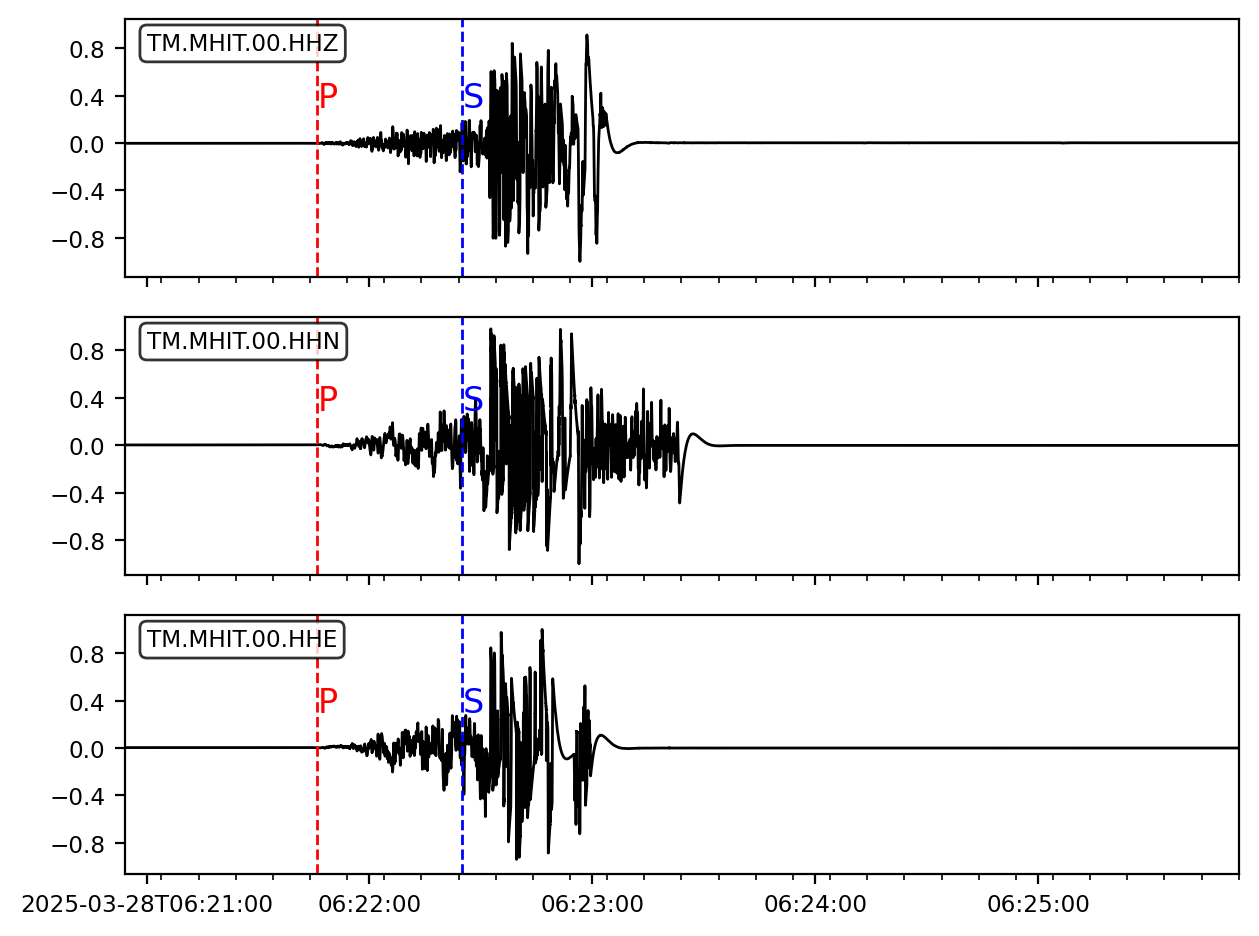

In [ ]:
from datetime import datetime
pick_data = {}
pick_data['MHIT'] = dict(
    p_arr = datetime(2025,3,28,6,21,46),
    s_arr = datetime(2025,3,28,6,22,25))
plot_waveforms('MHIT')

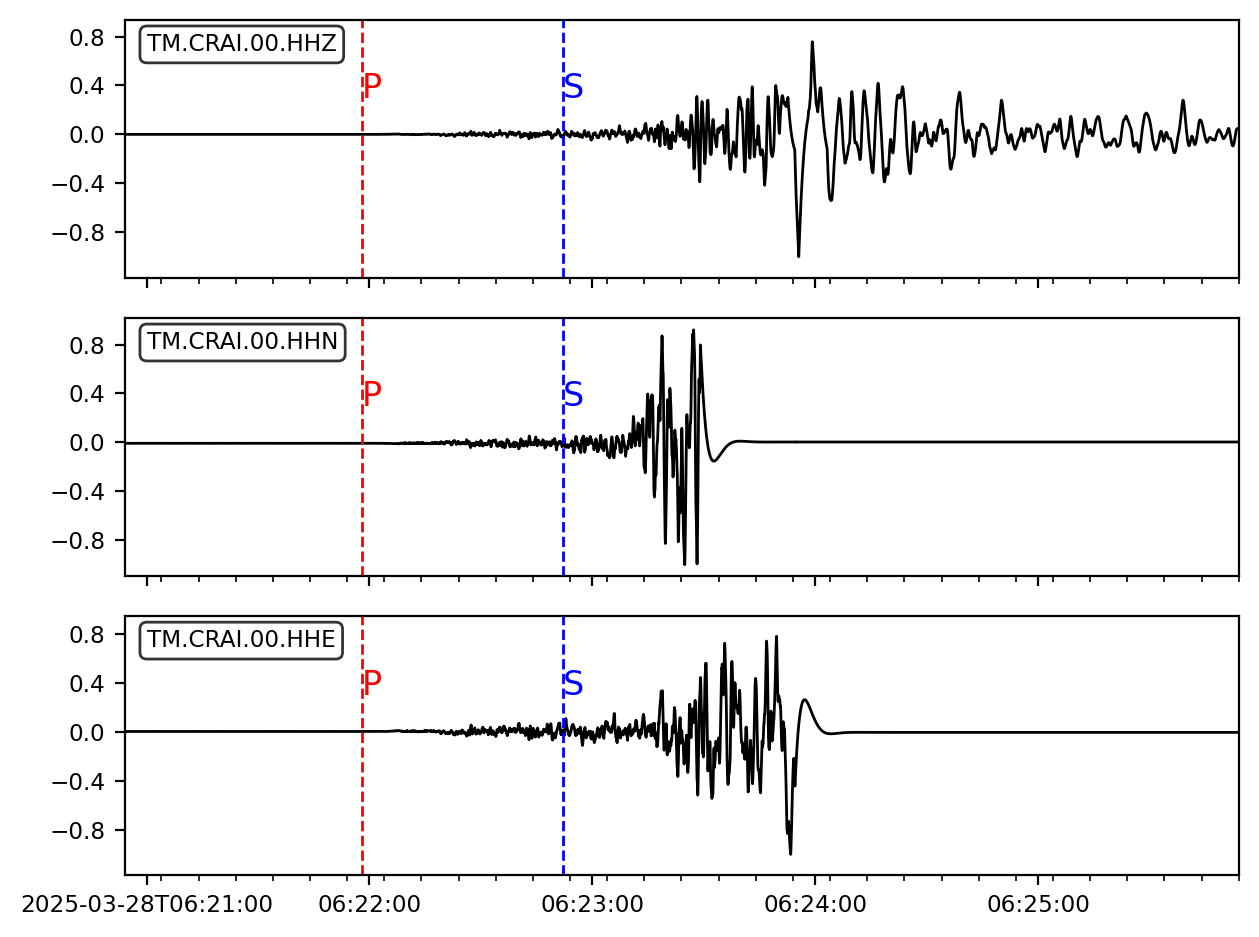

In [ ]:
pick_data['CRAI'] = dict(
    p_arr = datetime(2025,3,28,6,21,58),
    s_arr = datetime(2025,3,28,6,22,52))
plot_waveforms('CRAI')

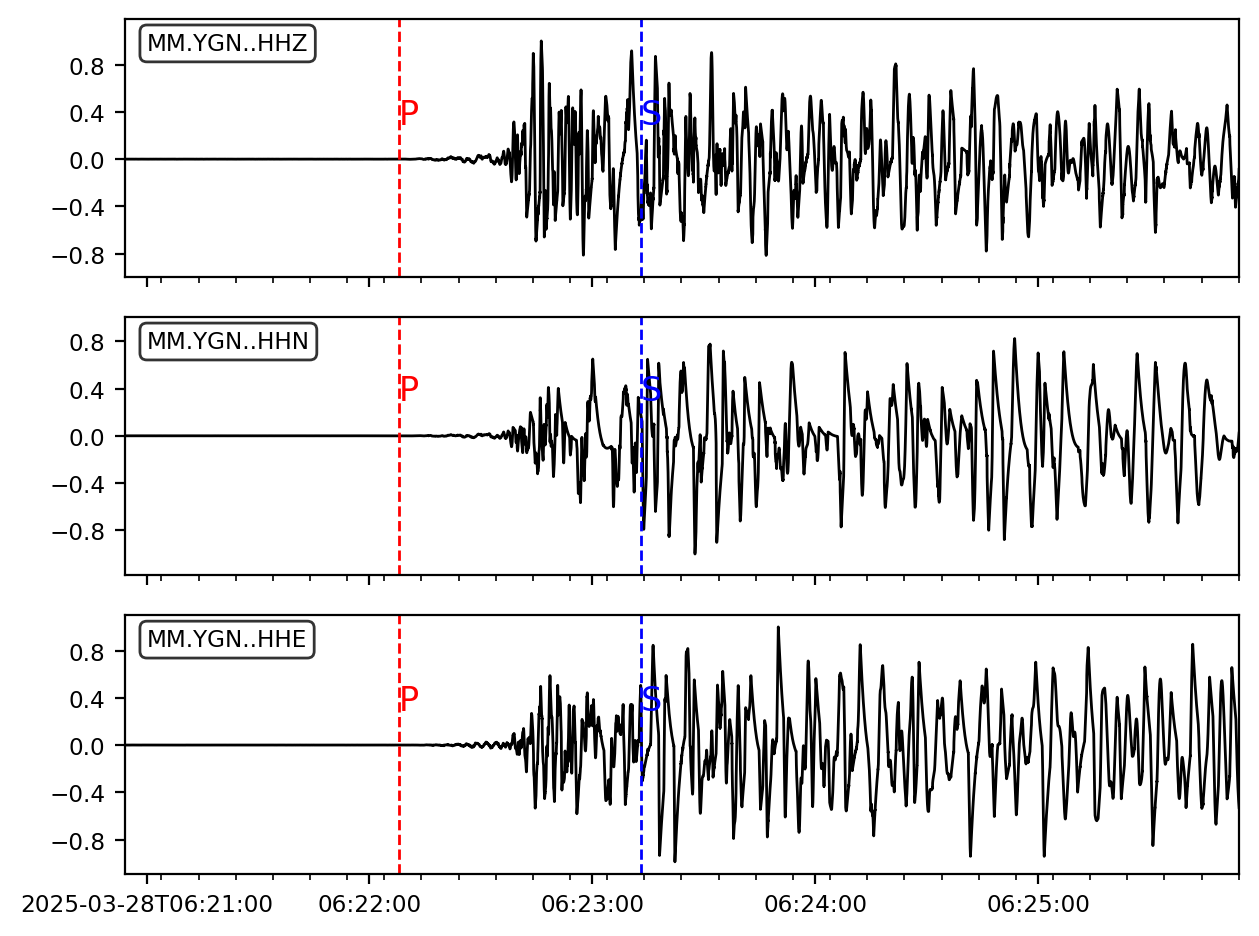

In [ ]:
pick_data['YGN'] = dict(
    p_arr = datetime(2025,3,28,6,22,8),
    s_arr = datetime(2025,3,28,6,23,13))
plot_waveforms('YGN')

## P and S wave time travel curve

In [ ]:
## biuld time travel cure for P and S waves
dist = np.arange(0, 1800, 50)
time_p = np.zeros_like(dist)
time_s = np.zeros_like(dist)
for i, d in enumerate(dist):
    arvs = taup_model.get_travel_times(source_depth_in_km=0, distance_in_degree = d/111.1195, phase_list=['P'])
    time_p[i] = arvs[0].time
    arvs = taup_model.get_travel_times(source_depth_in_km=0, distance_in_degree = d/111.1195, phase_list=['S'])
    time_s[i] = arvs[0].time

for station in pick_data:
    # time difference to distance conversion
    tdiff = UTCDateTime(pick_data[station]['s_arr']) - UTCDateTime(pick_data[station]['p_arr'])
    pick_data[station]['dist'] = np.interp(tdiff, time_s - time_p, dist)
    # update the pick_data dictionary with the station coordiates
    pick_data[station]['lat'] = inv.select(station=station)[0][0].latitude
    pick_data[station]['lon'] = inv.select(station=station)[0][0].longitude


# Earthquake triangulation

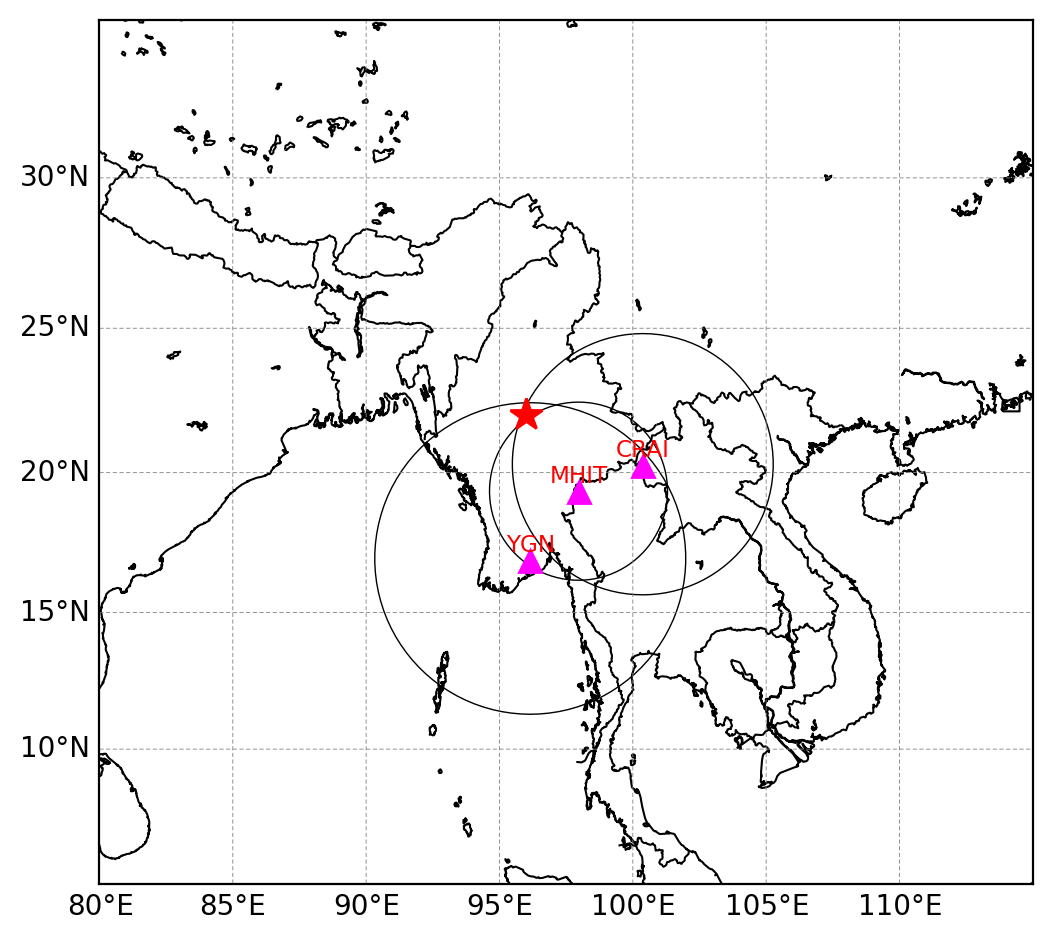

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# create new figure and axis
fig, ax = plt.subplots()
# initialize the basemap, specifing the projection, the gegraphic boundary, and resolution
# the initialized map instance is attached to the axis ax
m = Basemap(projection='merc', ax=ax, llcrnrlat=5, urcrnrlat=35, llcrnrlon=80, urcrnrlon=115, resolution='i')
# draw coastlines and country boundaries
m.drawcoastlines(linewidth=0.75)
m.drawcountries(linewidth=0.75)
# draw parallels and meridians
m.drawparallels(np.arange(5, 35, 5), labels=[1, 0, 0, 0], linewidth=0.3, color='gray', dashes=(5,3))
m.drawmeridians(range(80, 115, 5), labels=[0, 0, 0, 1], linewidth=0.3, color='gray', dashes=(5,3))

# plot the station locations
for key, val in pick_data.items():
    m.plot(val['lon'], val['lat'], '^', c='magenta', markersize=8, latlon=True)
    m.tissot(val['lon'], val['lat'], val['dist']/111.1195, 100, facecolor='none', edgecolor='k', linewidth=0.5)
    x,y =m(val['lon'], val['lat'])
    ax.text(x,y+4e4, key, fontsize='small', color='r', ha='center')

# plot the epicenter
m.plot(origin_lon, origin_lat, 'r*', markersize=12, label='Epicenter', latlon=True)

# show the plot
plt.tight_layout()
plt.show()